# Попиксельное преобразование изображений
# 每像素图像转换

В этом блокноте мы рассмотрим простой пример попиксельных изменений (преобразований) изображений.  
在本笔记本中，我们将查看图像逐像素更改（转换）的简单示例。

Для начала установим необходимую версию библиотеки и подключим то, чем будем пользоваться в дальнейшем.  
首先，让我们安装所需版本的库并连接我们将来要使用的库。

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

Считаем исходное изображение и переведем его из цветового пространства BGR в привычное RGB. Представление картинки — тензор. В элементе <code>img_original[i][j]</code> содержится $3$ значения, равные интенсивностям пикселя $(i, j)$ относительно трех цветовых каналов; значения находятся в диапазоне $[0, 255] \cap \mathbb Z$.  
我们读取原始图像并将其从 BGR 颜色空间转换为通常的 RGB。图片的表示是张量。 <code>img_original[i][j]</code> 元素包含 $3$ 值，等于相对于三个颜色通道的像素强度 $(i, j)$；值的范围为 $[0, 255] \cap \mathbb Z$。

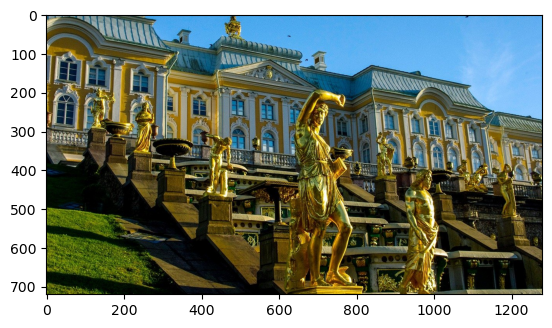

In [3]:
img_original = cv2.imread('test1.jpg') # use opencv to load img 'test.jpg'
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) # convert BGR format to RGB format
plt.imshow(img_original) # use matplotlib to show img
plt.show()

Найдем ширину, высоту и среднее значение интенсивности пикселя исходного изображения:  
让我们找到原始图像的宽度、高度和平均像素强度：

In [4]:
print("высота:", img_original.shape[0], "ширина:", img_original.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_original))

высота: 720 ширина: 1280
среднее значение интенсивности пикселя: 84.92830367476851


# Изменение экспозиции при помощи библиотеки  
# 使用库更改曝光

Попробуем повторить произведенные преобразования средствами библиотеки CV2. Для этого нам потребуется сохранить изображение в файл, а затем произвести чтение из файла. При этом файл должен быть сжат алгоритмом без потери качества (например, подойдет .png; при использовании, например, .jpeg, результат будет немного другим).  
让我们尝试重复使用 CV2 库进行的转换。为此，我们需要将图像保存到文件中，然后从文件中读取。在这种情况下，必须使用不损失质量的算法来压缩文件（例如，.png 是合适的；例如，当使用 .jpeg 时，结果会略有不同）。

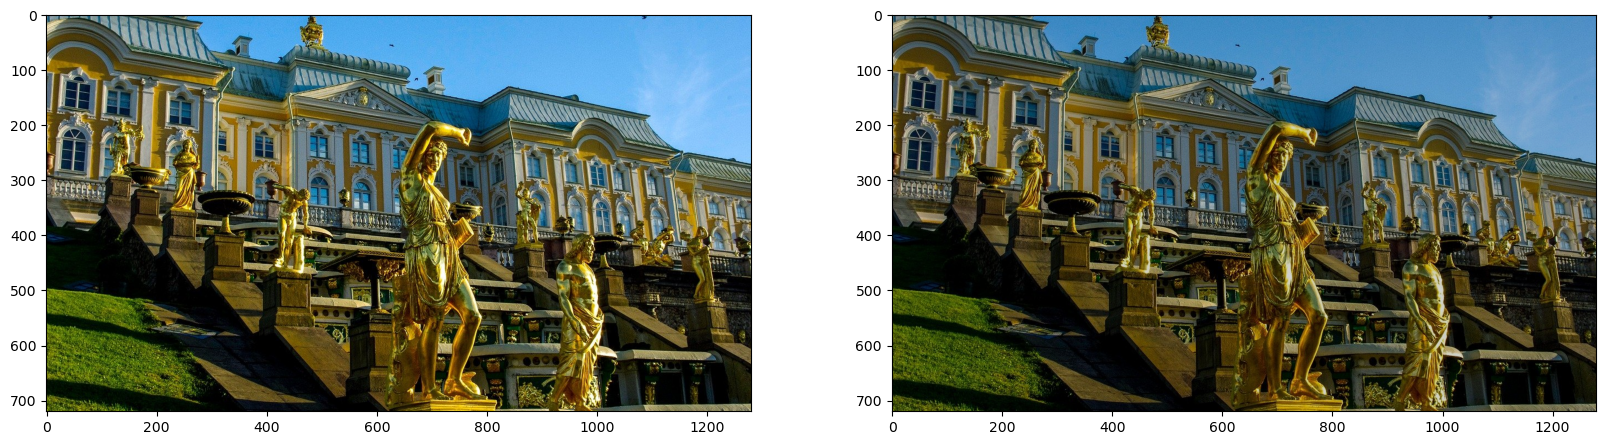

In [5]:
def exposure(image, p): # define exposure function
    return image.copy() * (2 ** p)

img_original = cv2.imread('test1.jpg') # use opencv to load img 'test.jpg'
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) # convert BGR format to RGB format
#Преобразование
img_result_lib = exposure(img_original, -0.28)
#Сохранение в файл
cv2.imwrite("img_result_lib.png", img_result_lib) # save result img as 'img_result_lib.png'
#Чтение из файла
img_result_lib = cv2.imread("img_result_lib.png")


fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # create 2 windows of subplots with size of 20x10
axes[0].imshow(img_original) # show original img in window 1
axes[1].imshow(img_result_lib) # show result img in window 2

In [6]:
print("высота:", img_result_lib.shape[0], "ширина:", img_result_lib.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_result_lib))

высота: 720 ширина: 1280
среднее значение интенсивности пикселя: 69.94137297453703


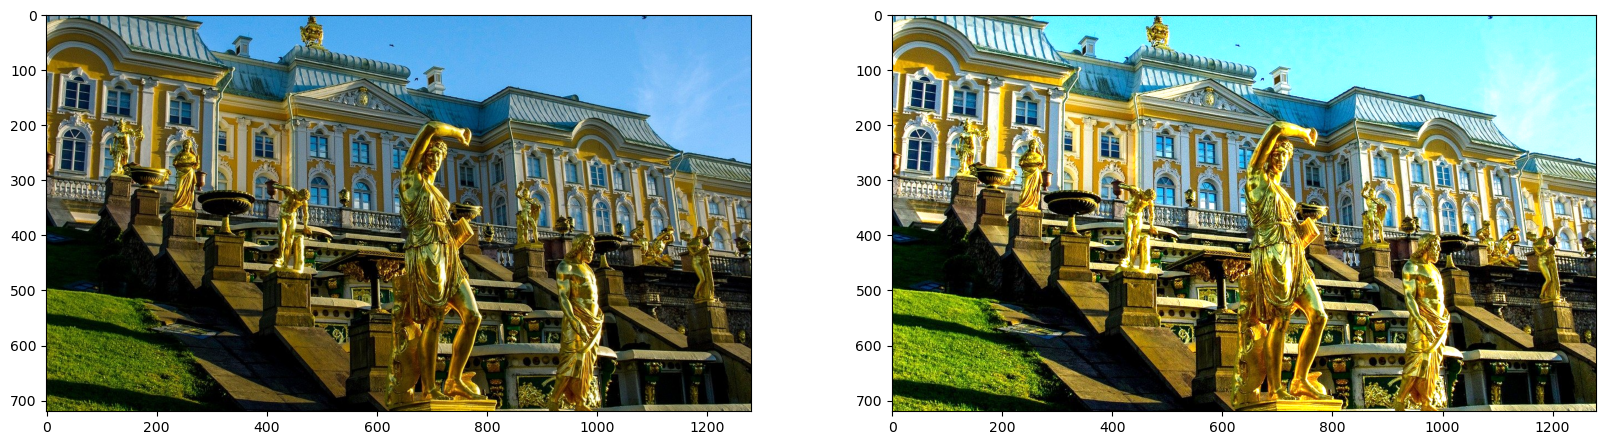

In [12]:
def exposure(image, p): # define exposure function
    return image.copy() * (2 ** p)

img_original = cv2.imread('test1.jpg') # use opencv to load img 'test.jpg'
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) # convert BGR format to RGB format
#Преобразование
img_result_lib = exposure(img_original, 0.58)
#Сохранение в файл
cv2.imwrite("img_result_lib.png", img_result_lib) # save result img as 'img_result_lib.png'
#Чтение из файла
img_result_lib = cv2.imread("img_result_lib.png")

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # create 2 windows of subplots with size of 20x10
axes[0].imshow(img_original) # show original img in window 1
axes[1].imshow(img_result_lib) # show result img in window 2

In [8]:
print("высота:", img_result_lib.shape[0], "ширина:", img_result_lib.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_result_lib))

высота: 720 ширина: 1280
среднее значение интенсивности пикселя: 118.60685004340277


# Изменение контрастность при помощи библиотеки  
# 使用库更改对比度

Обратите внимание, что при применении преобразования контрастности предполагается, что значения интенсивностей пикселей каналов R, G, B находятся в диапазоне $[0,1]$. Чтобы этого добиться (ведь изначально они находятся в диапазоне $[0,255]\cap Z$), достаточно разделить все интенсивности в матричном представлении изображения на $255$. При этом, если после преобразований $I_{out}[x,y]\gt 1$, то нужно считать, что $I_{out}[x, y] = 1$. Аналогично, если $I_{out}[x, y] \lt 0$, то нужно считать, что $I_{out} = 0$. Далее следует произвести обратное масштабирование значений интенсивностей каналов R, G, B в диапазон $[0, 255]$ с огруглением до целых по правилам математики.  
请注意，应用对比度变换时，假设 R、G、B 通道的像素强度在 $[0,1]$ 范围内。为了实现这一点（毕竟，它们最初在 $[0,255]\cap Z$ 范围内），将图像矩阵表示中的所有强度除以 $255$ 就足够了。此外，如果变换后 $I_{out}[x,y]\gt 1$，那么我们必须假设 $I_{out}[x, y] = 1$。类似地，如果 $I_{out}[x, y] \lt 0$，那么我们必须假设 $I_{out} = 0$。接下来，您应该将 R、G、B 通道的强度值反向缩放到 $[0, 255]$ 范围内，并根据数学规则四舍五入为整数。

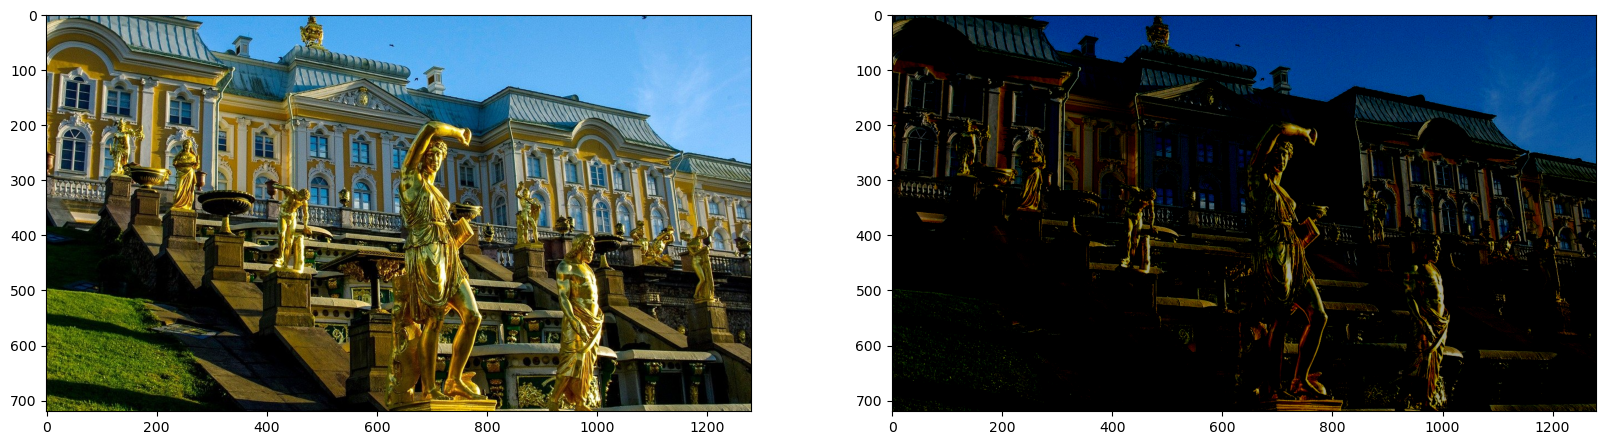

In [34]:
def contrast(image, p):
    img_result = image.copy() / 255.0
    if p > 0:
        img_result = (img_result - 0.5) / (1 - p)
    else:
        img_result = (img_result - 0.5) * (1 - p)
    img_result = img_result * 255

    return img_result

img_original = cv2.imread('test1.jpg') # use opencv to load img 'test.jpg'
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) # convert BGR format to RGB format
img_result_lib = contrast(img_original, -0.28)
cv2.imwrite("img_result_lib.png", img_result_lib)
img_result_lib = cv2.imread("img_result_lib.png")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result_lib)

In [30]:
print("высота:", img_result_lib.shape[0], "ширина:", img_result_lib.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_result_lib))

высота: 720 ширина: 1280
среднее значение интенсивности пикселя: 104.63173936631945


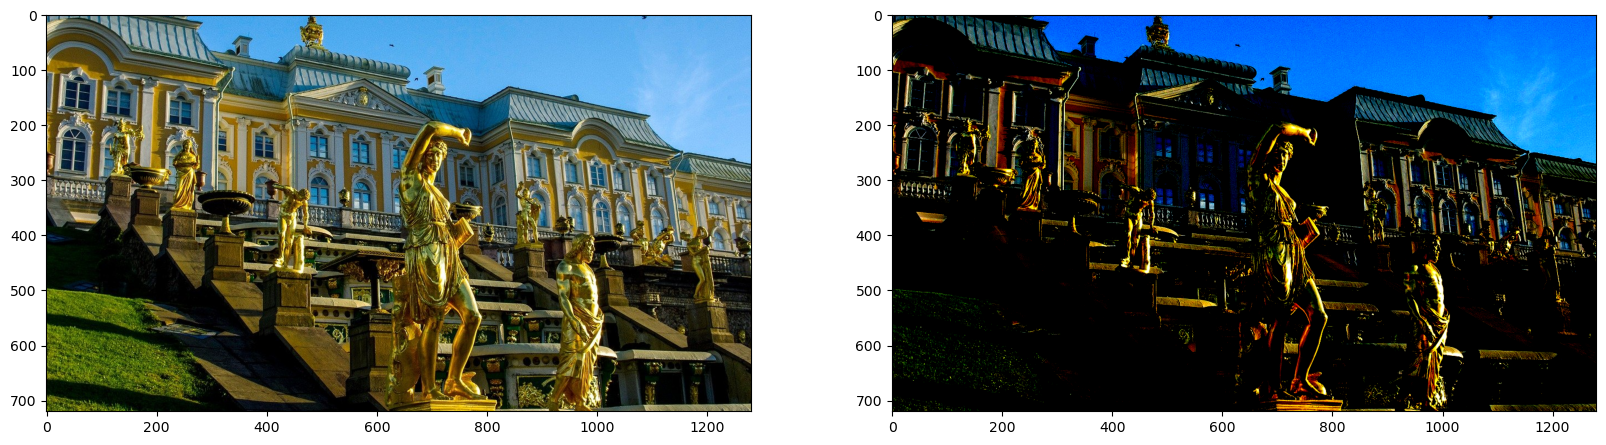

In [35]:
def contrast(image, p):  # incorrect!
    img_result = image.copy() / 255.0
    if p > 0:
        img_result = (img_result - 0.5) / (1 - p)
    else:
        img_result = (img_result - 0.5) * (1 - p)
    img_result = img_result * 255

    return img_result

img_original = cv2.imread('test1.jpg') # use opencv to load img 'test.jpg'
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) # convert BGR format to RGB format
img_result_lib = contrast(img_original, 0.58)
cv2.imwrite("img_result_lib.png", img_result_lib)
img_result_lib = cv2.imread("img_result_lib.png")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result_lib)

In [21]:
print("высота:", img_result_lib.shape[0], "ширина:", img_result_lib.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_result_lib))

высота: 720 ширина: 1280
среднее значение интенсивности пикселя: 154.78810908564816
